In [79]:
import matplotlib.pyplot as plt
from cycler import cycler
import sci_mplstyle_package
from matplotlib.ticker import MaxNLocator


# Font properties
# plt.rcParams['font.size'] = 20
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['legend.fontsize'] = 20
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20

# plt.rcParams['text.usetex'] = False  # Do not use LaTeX for text rendering
# plt.rcParams['font.family'] = 'serif'  # Set the font family to serif
# plt.rcParams['font.serif'] = ['Palatino Linotype', 'DejaVu Serif']  # Use Palatino, fallback to DejaVu Serif
# plt.rcParams['mathtext.fontset'] = 'custom'  # Use custom fonts for mathtext
# plt.rcParams['mathtext.rm'] = 'Palatino Linotype'  # Roman (non-italic) font


# # Use LaTeX for math formatting
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['cmr10', 'Computer Modern Serif', 'DejaVu Serif']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['mathtext.fontset'] = 'cm'

# Figure properties
# plt.rcParams['figure.edgecolor'] = 'black'
# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['figure.dpi'] = 300

# # Axes properties
# plt.rcParams['axes.facecolor'] = '#eaeaf2' #[0.95, 0.95, 0.95]
# plt.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.spines.right'] = True
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.xmargin'] = 0.05
# plt.rcParams['axes.ymargin'] = 0.05
# = cycler
# plt.cycler("color", plt.cm.tab20c.colors)

# ax.set_prop_cycle(color=[
#     '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
#     '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
#     '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
#     '#17becf', '#9edae5'])

# plt.rcParams['axes.prop_cycle']   = cycler('color', ['#e66101', '#5e3c99', '#fdb863'])
#  '#aec7e8',

clr = ['#1f77b4', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5']
plt.rcParams['axes.prop_cycle']   = cycler('color', clr)


# Line properties
# plt.rcParams['lines.linewidth'] = 1.0
# plt.rcParams['lines.markersize'] = 1.0

# Legend properties
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.framealpha'] = 0.85
# plt.rcParams['legend.numpoints'] = 1

# Grid properties
# plt.rcParams['axes.grid'] = True
# plt.rcParams['grid.color'] = [1, 1, 1]
# plt.rcParams['grid.linewidth'] = 1.0
# plt.rcParams['grid.alpha'] = 1.0
# plt.rcParams['axes.axisbelow'] = True

# Tick properties (X-axis)
# plt.rcParams['xtick.color'] = 'black'
# plt.rcParams['xtick.direction'] = 'out'
# plt.rcParams['xtick.minor.visible'] = True
# plt.rcParams['xtick.minor.size'] = 3.0
# plt.rcParams['xtick.minor.width'] = 0.75
# plt.rcParams['xtick.major.size'] = 6.0
# plt.rcParams['xtick.major.width'] = 0.5

# Tick properties (Y-axis)
# plt.rcParams['ytick.color'] = 'black'
# plt.rcParams['ytick.direction'] = 'out'
# plt.rcParams['ytick.labelleft'] = True
# plt.rcParams['ytick.major.size'] = 6.0
# plt.rcParams['ytick.major.width'] = 0.95
# plt.rcParams['ytick.minor.size'] = 3.0
# plt.rcParams['ytick.minor.visible'] = False
# plt.rcParams['ytick.minor.width'] = 0.5

# # Savefig properties
# plt.rcParams['savefig.bbox'] = 'tight'
# plt.rcParams['savefig.pad_inches'] = 0.01



### Load Modules

In [80]:
# Restart the kernel
import os
import dill as pickle
notebook_dir = r"C:\Users\suparnob\OneDrive - Texas A&M University\Academic\INDEPENDENT_GITHUB\pubq_plots\Publication_quality_graphs\PYTHON\Plots\Cases\HYPER_REDUCTION\Sec_Reduced order modeling in heat conduction\HC_paper\data"
current_dir = os.getcwd()
os.chdir(r"C:\Users\suparnob\OneDrive - Texas A&M University\Academic\TAMU_MATERIALS\POSTDOC\HYPERREDUCTION\SUPARNO\HYPERREDUCTION__TAMIDS\pyHyperRom")

In [81]:
working_dir = os.getcwd()
# folder = "linear"
folder ="nonlinear" # make sure to change the thermal properties 

In [82]:
# Basic and Utility Imports from Local Modules
from src.codes.basic import *
from src.codes.utils.fem_utils_HC import *
from src.codes.utils.plot_files.plot_utils import OneDPlot as plot
from src.codes.utils.rom_utils import *

# from src.codes.utils.plot_utils import data_stats

# # Problem Classes for Heat Conduction
if folder=="linear":
    from src.codes.prob_classes.heat_conduction.base_class_heat_conduction import ROM_simulation_affine
else:
    from src.codes.prob_classes.heat_conduction.base_class_heat_conduction import ROM_simulation
# os.chdir(current_dir)

# # Reduced Order Modeling (ROM) Classes
import src.codes.reductor.rom_class_ms as rom_class

# Algorithms for ECSW Model Reduction
# from src.codes.algorithms.ecsw import ecsw_red
import src.codes.algorithms.deim as deim_module

# Third-Party Libraries for Data Handling and Visualization
import ptitprince as pt
import pandas as pd
import time as time

In [83]:
import sci_mplstyle_package

### Epistemic Uncertainty[Number of snapshots]

In [84]:
Model_error = []
Model_ROM_error = []

In [85]:
q_param = (-1000, 1000) # For F
k_param = (-4, 4) # For K
param_ranges = [k_param, q_param]
method = 'sobol'

In [86]:
p = 4
N_snap=2**p
print(N_snap)

16


### Generate Training datasets using different distribution

In [87]:
import numpy as np
from examples.heat_conduction.OneD_heat_conduction.FEM_1D_data_gen_paper import data_gen

In [88]:
# data_gen??

In [89]:
notebook_dir

'C:\\Users\\suparnob\\OneDrive - Texas A&M University\\Academic\\INDEPENDENT_GITHUB\\pubq_plots\\Publication_quality_graphs\\PYTHON\\Plots\\Cases\\HYPER_REDUCTION\\Sec_Reduced order modeling in heat conduction\\HC_paper\\data'

In [90]:
# from src.codes.prob_classes.structural_mechanics.base_class_struc_mech_NL_static_axial import ROM_simulation_UQ

# Step 2: Modify the parameter
# Specify mean and standard deviation

# generate = True
# filename_dataC = f'data/DataClass_NL_Final_new_{N_snap}_{method}.dill'
# filename_dataC = f'DataClass_{folder}_Final_new_{N_snap}_{method}_deim.dill'
# filename_dataC = f'DataClass_{folder}_Final_new_{N_snap}_{method}_ec.dill'
filename_dataC = f'DataClass_{folder}_Final_new_{N_snap}_{method}_ecm.dill'



if os.path.exists(notebook_dir+'/'+filename_dataC):

    generate = False

    with open(notebook_dir+'/'+filename_dataC, 'rb') as f:
        Data_cls = pickle.load(f)
    

else:
#     generate = True
#     params = generate_sobol(len(param_ranges), N_snap, param_ranges)
#     print(params)


    generate = True
    params_train = generate_sobol(len(param_ranges), N_snap, param_ranges)
    params_test = generate_sobol(len(param_ranges), N_snap, param_ranges)


    params = np.append(params_train,params_test,axis=0)


    train_mask = np.ones(N_snap*2,dtype=bool)
    train_mask[N_snap:] = False
    # train_mask = bool(train_mask)


    test_mask = np.zeros(2*N_snap,dtype=bool)
    test_mask[N_snap:] = True

    print(params)

In [91]:
# # Legend properties
# plt.rcParams['legend.frameon'] = True
# plt.rcParams['legend.fancybox'] = True
# plt.rcParams['legend.framealpha'] = 1.0

# fig,ax= plt.subplots()
# ax.scatter(params[train_mask,0],params[train_mask,1],color='k')
# ax.scatter(params[test_mask,0],params[test_mask,1],color='white',edgecolors='k')
# plt.xlabel('$\mu$')
# plt.ylabel('$\\beta$')
# plt.legend(['Training','Testing'])
# plt.savefig(notebook_dir+"/param_list.pdf",format = "pdf")

In [92]:
if(generate):

    tic = time.perf_counter()
    if folder=="linear":
        Data_cls = data_gen(params,notebook_dir+'/'+filename_dataC,affine=True,train_mask=train_mask,test_mask=test_mask)
    else:
        Data_cls = data_gen(params, notebook_dir+'/'+filename_dataC, train_mask=train_mask,test_mask=test_mask)

    toc = time.perf_counter()
    fom_time = toc-tic


In [93]:
# load required variables from data
FOS = Data_cls.FOS
d = FOS.data
mask = d.mask

param_list = np.asarray(Data_cls.param_list)

NLS = np.asarray(Data_cls.NL_solutions)

K_mus = Data_cls.K_mus
q_mus = Data_cls.q_mus

# NLS_train = NLS[:,d.mask]

train_mask, test_mask = Data_cls.train_mask, Data_cls.test_mask 
NLS_train = NLS[train_mask][:,d.mask]
NLS_test = NLS[test_mask][:,d.mask]


N_snap,_ = np.shape(NLS)
print(N_snap)

32


In [94]:
param_list[:16]

array([[-2.44929679e+00,  8.84217340e+01],
       [ 1.35320007e+00, -5.19698672e+00],
       [ 3.97497007e+00,  7.01768918e+02],
       [-8.16313706e-01, -6.41868161e+02],
       [-1.47658405e+00,  9.49911917e+02],
       [ 2.32591470e+00, -8.93969839e+02],
       [ 9.39755864e-01,  3.36555680e+02],
       [-3.85152602e+00, -2.57306764e+02],
       [-3.12617763e+00,  5.83265914e+02],
       [ 3.56961191e-02, -5.10356085e+02],
       [ 2.66747402e+00,  1.88797237e+02],
       [-1.51443286e+00, -1.54836444e+02],
       [-1.61275506e-01,  4.40907111e+02],
       [ 3.00059635e+00, -4.02970413e+02],
       [ 1.64007421e+00,  8.35367674e+02],
       [-2.54183457e+00, -7.58499121e+02]])

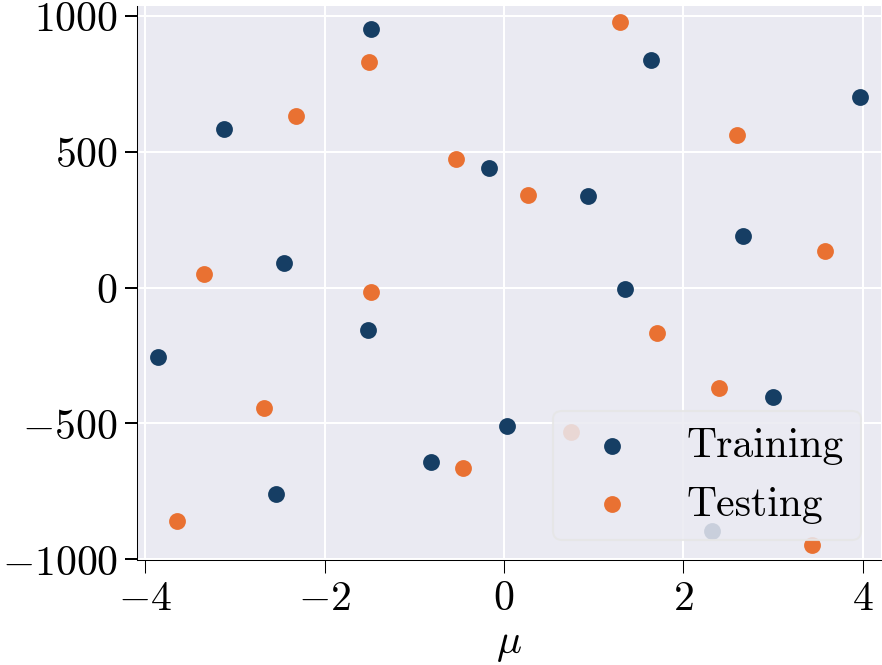

In [95]:
plt.scatter(param_list[:16][:,0],param_list[:16][:,1],s=50,c='#163e64',label="Training")
plt.scatter(param_list[16:][:,0],param_list[16:][:,1],s=50,c='#e97132',label="Testing")
plt.xlabel("$\mu$")
# plt.ylabel("$\\beta$")
plt.yticks()
plt.legend()
plt.savefig("param_list_NL.pdf",dpi=300)

In [96]:
os.chdir(current_dir)

### Mean Subtraction

In [97]:
NLS_train_mean = np.mean(NLS_train,axis = 0)
NLS_train_ms = NLS_train - NLS_train_mean

### Plot snapshots

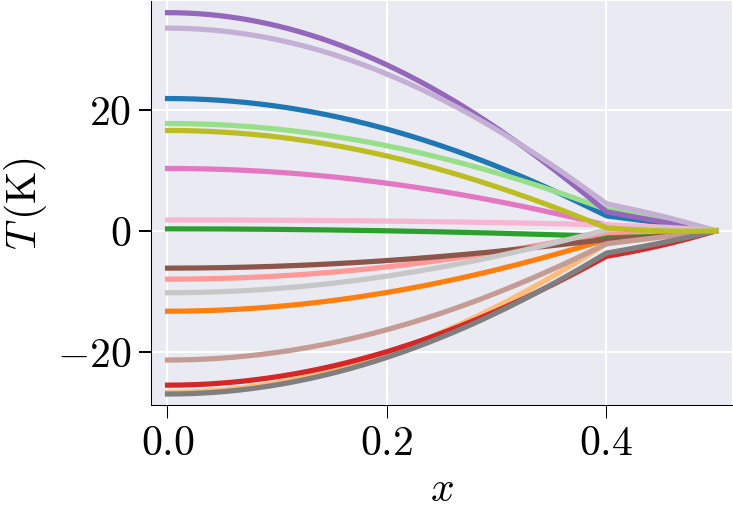

In [98]:
fig, ax = plt.subplots(figsize=(5,3.5))
plt.rcParams['axes.prop_cycle'] = plt.cycler("color", clr)

for i in range(len(NLS_train_ms)):
    
    ax.plot(d.xi[0][1:], NLS_train_ms[i])
    # Plot = plot(d.xi[0][1:], NLS_train_ms[i], ax=ax)
    # plt.rcParams['figure.dpi'] = 150
    # Plot.line_()

plt.ylabel('$T\,$(K)')
plt.xlabel('$x$')

# plt.savefig(notebook_dir+f"/New_{folder}/{folder}_T_FOM.pdf",format="pdf")
plt.rcParams['axes.facecolor'] = '#eaeaf2'


#### Step 1: Perform SVD on the snapshots (calculate $\mathbb{V}(=\mathbb{W}$)):

Number of modes selected: 5


Text(0.5, 0, 'POD modes ($k$)')

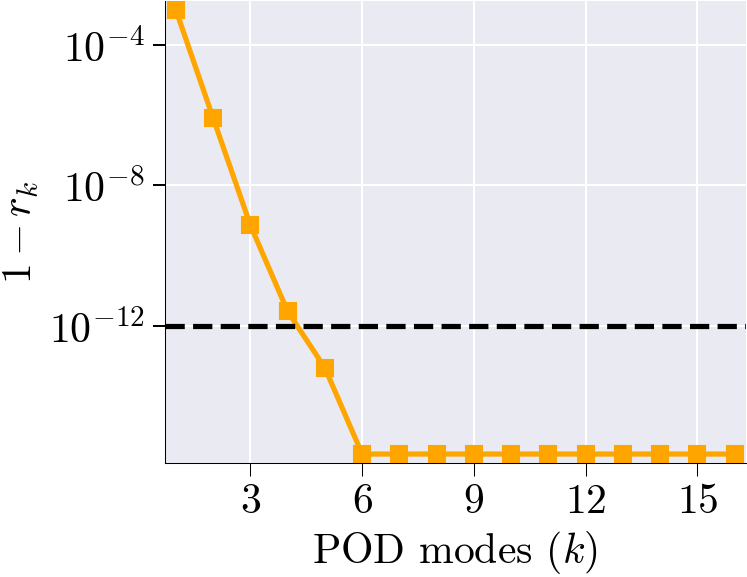

In [99]:
# fig, ax = plt.subplots(figsize=(5,3.5))
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.linewidth'] = 2.5

n_sel, U = svd_mode_selector(NLS_train_ms, tolerance=1e-12,modes=True)
n_sel = 3
V_sel = U[:, :n_sel]
plt.ylabel('$1-r_{k}$')
plt.xlabel('POD modes ($k$)')
# plt.savefig(notebook_dir+f"/New_{folder}/{folder}_Mode_selection.pdf", format="pdf")

In [100]:
V_sel.shape

(5000, 3)

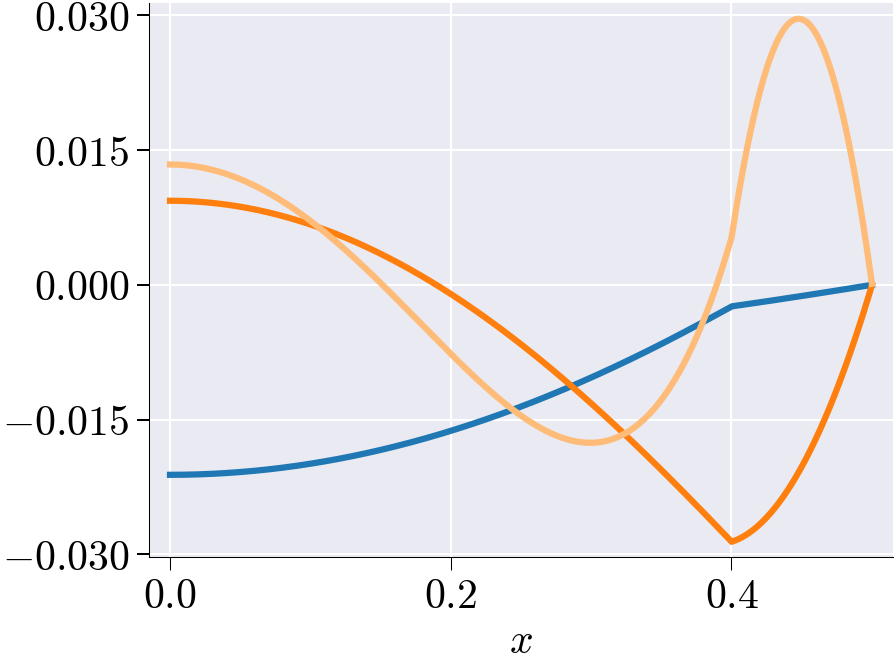

In [101]:
fig, ax = plt.subplots()
plt.rcParams['axes.prop_cycle'] = plt.cycler("color", clr)


for i in range(n_sel):
    # Plot = plot(d.xi[0][1:], V_sel[:,i], ax=ax)
    # Plot.line_()
    
    plt.plot(d.xi[0][1:], V_sel[:,i],lw=3)

ax.set_xlabel('$x$')
if folder=="linear":
    ax.set_ylabel('$\psi(x)$')
    
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) 
plt.show()
# plt.savefig(notebook_dir+f"/New_{folder}/{folder}_Mode_shapes.pdf", format="pdf")

### Step 2: Perform SVD on the force snapshots

In [102]:
len(Data_cls.rhs[0])

5000

In [103]:
d.xi[0].shape

(5001,)

In [104]:
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

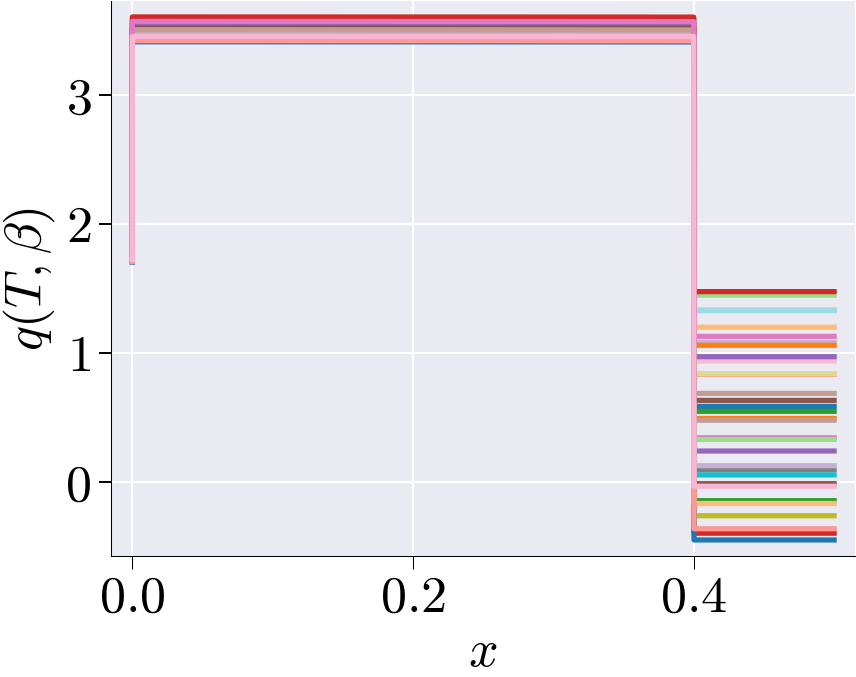

In [105]:
F_nl = np.asarray(Data_cls.rhs)

fig, ax = plt.subplots()
for i in range(len(F_nl)):
    ax.plot(d.xi[0][:-1],F_nl[i])
plt.xlabel('$x$')
plt.ylabel('$q(T,\\beta)$')
plt.savefig('DEIM_snapshots.pdf',dpi=300)

Selected modes:3
Z_indices=[1, 4001, 3272, 2291, 2290, 2292, 2293, 4002, 2289, 2294, 2288, 2295, 4003, 2287, 2296, 2286, 2297, 4004, 2285, 2298, 2284, 2299, 4005]


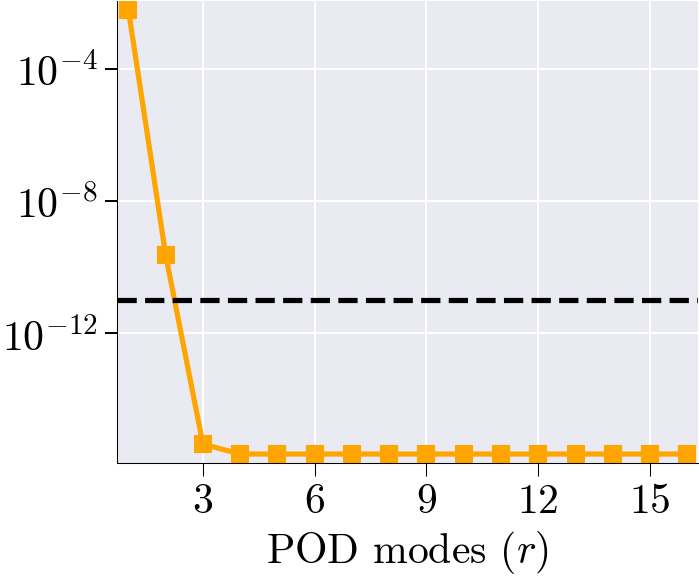

In [ ]:
# Force snapshots
F_nl = np.asarray(Data_cls.rhs)

deim = deim_module.deim(d,F_nl,train_mask,param_list,V_sel,NLS_train_ms,d.mask,tol_f=1e-11, extra_modes=0, extra_samples=0)

tic_h_setup_b = time.time()
deim.select_elems()
toc_h_setup_b = time.time()

xi = deim.xi
plt.xlabel('POD modes ($r$)')
plt.savefig('DEIM_SVs.pdf',dpi=300)

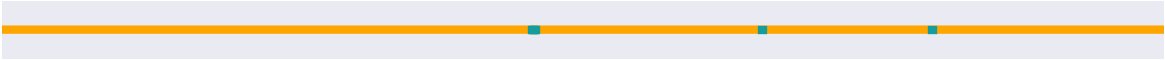

Fraction of total elements active in the ROM: 0.54%


In [157]:
plot(np.arange(d.ncells[0]), xi, ax="").element_()
print(f"Fraction of total elements active in the ROM: {len(xi[xi>0])*100/len(xi)}%")

In [158]:
xi_arg = np.argwhere(xi>0)

In [159]:
def select_elements_and_weights(element_indices, weights):
    element_to_gauss_weights = {}

    # Populate each selected element with weights
    for idx, weight in zip(element_indices, weights):
        # Ensure idx is a scalar by extracting the first element if it's an array
        if isinstance(idx, np.ndarray) and idx.size == 1:
            idx = idx.item()  # Convert single-element array to scalar
        
        if idx not in element_to_gauss_weights:
            # Initialize the element with zero if not already in the dictionary
            element_to_gauss_weights[idx] = 0
        
        # Update the weight for the selected Gauss point
        element_to_gauss_weights[idx] += weight

    return element_to_gauss_weights

In [160]:
selected_elements = select_elements_and_weights(xi_arg,np.ones_like(xi_arg))
# selected_elements = select_elements_and_weights_all_elements_test(500,Data_cls.FOS)

print("Selected elements and weights:", selected_elements)

Selected elements and weights: {0: array([1], dtype=int64), 1: array([1], dtype=int64), 2283: array([1], dtype=int64), 2284: array([1], dtype=int64), 2285: array([1], dtype=int64), 2286: array([1], dtype=int64), 2287: array([1], dtype=int64), 2288: array([1], dtype=int64), 2289: array([1], dtype=int64), 2290: array([1], dtype=int64), 2291: array([1], dtype=int64), 2292: array([1], dtype=int64), 2293: array([1], dtype=int64), 2294: array([1], dtype=int64), 2295: array([1], dtype=int64), 2296: array([1], dtype=int64), 2297: array([1], dtype=int64), 2298: array([1], dtype=int64), 2299: array([1], dtype=int64), 3271: array([1], dtype=int64), 3272: array([1], dtype=int64), 4000: array([1], dtype=int64), 4001: array([1], dtype=int64), 4002: array([1], dtype=int64), 4003: array([1], dtype=int64), 4004: array([1], dtype=int64), 4005: array([1], dtype=int64)}


In [161]:
import numpy as np
import matplotlib.pyplot as plt

def element_marker(xi, highlight_color='white', edgecolor='#163e64', clr='#163e64', linewidth=4, fsize=(11, 1), marker_size=5, marker='o'):
    """
    Method: element_
    Purpose: Generates a 1D line plot and highlights specific elements based on a mask using markers.
    Parameters:
    - xi: Array of x-values where nonzero points will be highlighted.
    - highlight_color: The color used to highlight specific points.
    - edgecolor: The color used for the marker edge.
    - clr: The default color of the line plot.
    - linewidth: The width of the line.
    - figsize: The size of the figure.
    - marker_size: Size of the markers used for highlighting.
    - marker: Marker style for highlighted points.
    """
    # Create a mask for non-zero elements in xi
    mask_xi = xi.astype(bool)
    
        # Normalize xi for marker size calculation (to avoid extreme sizes)
    normalized_xi = np.abs(xi) / np.max(np.abs(xi))  # Normalize by the maximum value of xi

    # Calculate marker sizes based on the normalized values of xi
    marker_sizes = normalized_xi * 100  # Scale the sizes
    
    fig, ax = plt.subplots(figsize=fsize)
    x_values = np.arange(0, len(xi), 1)
    y_values = np.zeros_like(x_values)  # All y-values are 0 to represent a line on the x-axis

    # Draw the basic line plot
    ax.plot(x_values, y_values, color=clr, linewidth=linewidth,zorder=0)
    ax.set_facecolor('white')
    # Hide axis ticks and labels
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])

    # Highlight specific elements using markers for non-zero xi, with sizes based on xi values
    ax.scatter(x_values[mask_xi], y_values[mask_xi], facecolor=highlight_color, edgecolor=edgecolor, 
               s=marker_sizes[mask_xi], marker=marker,zorder=2,lw=2)

    # Hide the spines
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)

    # plt.autoscale(tight=True)

1.0


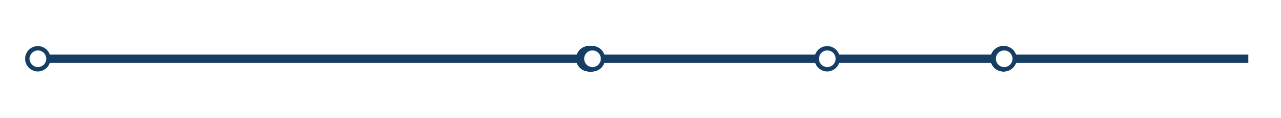

In [162]:
element_marker(xi)
print(max(xi))
plt.savefig('reduced_mesh_deim.pdf',dpi=600)


### ROM Simulation

In [163]:
Data_cls.mean = NLS_train_mean

In [164]:
eval_rom = False
eval_h_rom = True

In [165]:
if eval_rom:
    
    if folder=="linear":
        ROM = ROM_simulation_affine(Data_cls, NLS_test, param_list, test_mask, V_sel) #, N_rom_snap=1)
    else:
        ROM = ROM_simulation(Data_cls, NLS_test, param_list, test_mask, V_sel)

    ROM.run_simulation()

In [166]:
if eval_h_rom:
    ROM_h = ROM_simulation(Data_cls, NLS_test, param_list, test_mask, V_sel, xi=selected_elements, deim=deim)#, N_rom_snap=1)
    ROM_h.run_simulation_h_deim()

573.15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


### Performance Statistics

In [167]:
NLS_rom_h = np.asarray(ROM_h.NL_solutions_rom)
ROM_speed_up_h = ROM_h.speed_up_h
ROM_relative_error_h = ROM_h.rom_error
Model_error.append(ROM_relative_error_h)

In [168]:
Model_error[-1]

[0.0011753829987188272,
 0.00074696678868093,
 0.0019294118112922407,
 0.00465731718282563,
 0.0015476796781504604,
 0.0003322227834320275,
 5.189846838682999e-05,
 0.00101491375205897,
 0.002750846475685066,
 0.003261123293414334,
 4.147495731612828e-06,
 0.00028181313675570746,
 0.0017897345589955856,
 0.0011453398739200546,
 0.0026001714734259053,
 0.0009284363899101296]

In [169]:
NLS_rom = np.asarray(ROM.NL_solutions_rom)
ROM_speed_up = ROM.speed_up
# ROM_speed_up = list(300*np.ones(len(ROM_speed_up)-1))
ROM_relative_error = ROM.rom_error
Model_ROM_error.append(ROM_relative_error)

In [170]:
plt.rcParams['figure.dpi'] = 150

In [171]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

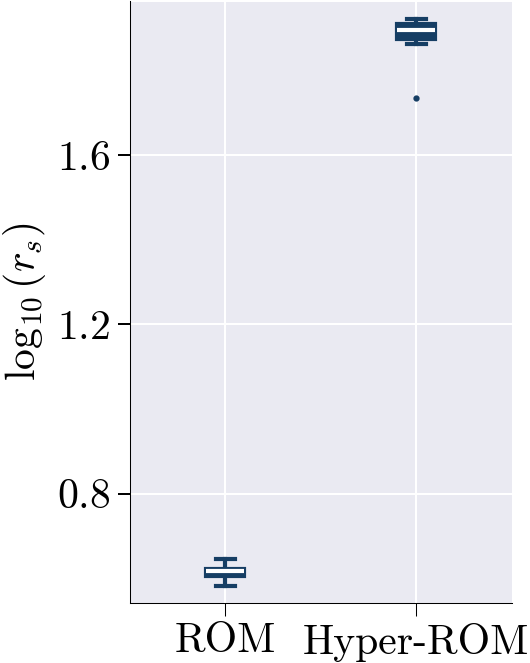

In [172]:
import numpy as np
from matplotlib.ticker import MaxNLocator

def data_stats(datasets, labels=None, show_mean_std=False, ylabel="$y$", xlabel="$x$", axbox=None):
    """
    Plot a boxplot for multiple datasets. Each dataset will have its own box in the plot.

    :param datasets: list of array-like, The datasets to plot.
    :param labels: list of str, Labels for each dataset.
    :param show_mean_std: bool, If True, show the mean and standard deviation on the boxplot.
    :param ylabel: str, Label for the y-axis.
    :param xlabel: str, Label for the x-axis.
    """
    if axbox is None:
        _, ax_box = plt.subplots(figsize=(3, 5))  # Adjusted height for better visibility
    else:
        ax_box = axbox

    # ax_box.set_facecolor('#f5f5f5')
    clr = '#163e64'
    # Boxplot properties
    boxprops = dict(linewidth=2.0, color=clr, facecolor=clr)
    meanprops = dict(marker='^', markeredgecolor='white', markersize=2, markerfacecolor='white') if show_mean_std else None

    # Create Box Plot with multiple datasets
    box = ax_box.boxplot(datasets, vert=True, patch_artist=True, widths=0.2,
                         labels=labels,
                         boxprops=boxprops,
                         whiskerprops=dict(linewidth=2.0, color=clr),
                         capprops=dict(linewidth=2.0, color=clr),
                         medianprops=dict(linewidth=2.0, color='white'),
                         meanprops=meanprops,
                         showmeans=show_mean_std,
                         flierprops=dict(marker='o', markerfacecolor=clr, markeredgecolor=clr, markersize=2, linestyle='none'))

    # Remove unwanted spines and ticks from the boxplot
    ax_box.spines['top'].set_visible(False)
    ax_box.spines['right'].set_visible(False)
    # ax_box.spines['left'].set_visible(False)
    ax_box.set_xlabel(xlabel)
    ax_box.set_ylabel(ylabel)

    # Optionally, remove y-axis ticks and labels if desired
    # ax_box.set_xticks([])
    ax_box.yaxis.set_major_locator(MaxNLocator(nbins=4))
    # Show the final plot
    plt.tight_layout()
    # plt.show()


# Sample datasets
# data1 = ROM_speed_up
# data2 = np.random.normal(1, 0.5, 100)
# data3 = np.random.normal(-1, 1.5, 100)


# Corresponding labels
labels = ['ROM', 'Hyper-ROM']
_, ax_box = plt.subplots(figsize=(4, 5)) 
# Call the modified function
data_stats([np.log10(ROM_speed_up), np.log10(ROM_speed_up_h)], labels=labels, ylabel="$\log_{10}(r_s)$", xlabel="",axbox=ax_box)
# plt.savefig('speed_up_comp_rom_hrom_sopt.pdf')

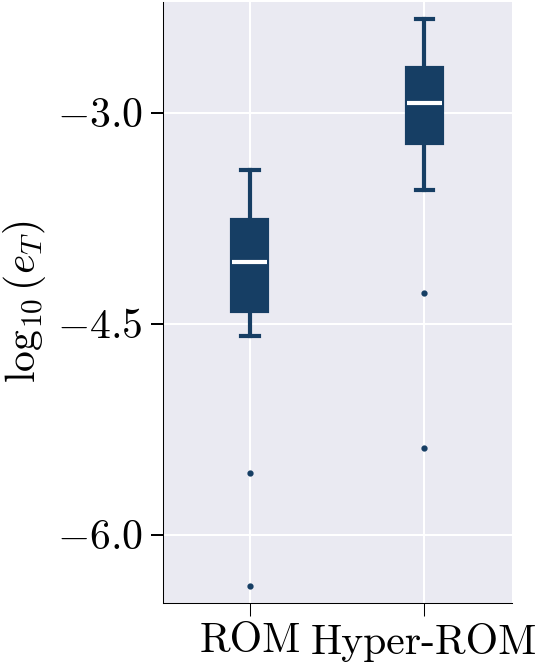

In [173]:
labels = ['ROM', 'Hyper-ROM']
_, ax_box = plt.subplots(figsize=(4, 5)) 
# Call the modified function
data_stats([np.log10(ROM_relative_error), np.log10(ROM_relative_error_h)], labels=labels, ylabel="$\log_{10}(e_T)$", xlabel="",axbox=ax_box)
# plt.savefig('error_comp_rom_hrom_deim.pdf')

In [174]:
# ROM_speed_up=ROM_speed_up[1:]

In [175]:
# ROM_speed_up=[ROM_speed_up[0],300,300,300,300,300,300]

In [176]:
# df_A = pd.DataFrame({'':'With hyperreduction','Relative error (log)%':np.log10(ROM_relative_error_h)})
# df_B = pd.DataFrame({'':'','Relative error (log)%':np.log10(ROM_relative_error)})

# # # Combine the DataFrames
# # df = pd.concat([df_A, df_B])

# fig, ax = plt.subplots(figsize=(8.3, 3))
# pt.RainCloud(x = '', y = 'Relative error (log)%', data = df_A, palette = "Oranges", bw = 0.2,
#     width_viol = 1., ax = ax, orient = "h",pointplot = False, dodge=False, alpha=1.0, width_box = 0.35, linewidth=1, point_size =2.0, move=0.2)
# plt.show()

# fig, ax = plt.subplots(figsize=(8.7, 3))
# pt.RainCloud(x = '', y = 'Relative error (log)%', data = df_B, palette = "viridis", bw = 0.2,
#     width_viol = 1., ax = ax, orient = "h",pointplot = False, dodge=False, alpha=1.0, width_box = 0.35, linewidth=1, point_size =6.0, move=0.2)
# # plt.savefig(notebook_dir+f"/{folder}/NLinear_ROM_accuracy.pdf",format="pdf")

# # ===

# df_C = pd.DataFrame({'':'With hyperreduction','Speed-up':ROM_speed_up_h})
# df_D = pd.DataFrame({'':'','Speed-up':ROM_speed_up})

# # # Combine the DataFrames
# # df2 = pd.concat([df_C, df_D])

# fig, ax = plt.subplots(figsize=(8.3, 2))
# pt.RainCloud(x = '', y = 'Speed-up', data = df_C, palette = "Oranges",
#     width_viol = 1.0, ax = ax, orient = "h",pointplot = False, dodge=True, alpha=1.0, width_box = 0.25, linewidth=1, point_size =2.0)

# fig, ax = plt.subplots(figsize=(8.6, 2))
# pt.RainCloud(x = '', y = 'Speed-up', data = df_D, palette = ["red"],
#     width_viol = 1.0, ax = ax, orient = "h",pointplot = False, dodge=True, alpha=0.95, width_box = 0.25, linewidth=1, point_size =6.0)
# # plt.savefig(notebook_dir+f"/{folder}/NLinear_Speedup.pdf",format="pdf")

Save data

In [177]:
# nonlinear_rom_error = np.log10(ROM_relative_error)
# np.save(notebook_dir+'nonlinear_rom_error.npy',nonlinear_rom_error)
# np.save(notebook_dir+'ROM_speed_up.npy',ROM_speed_up)

In [178]:
# nonlinear_rom_error = np.log10(ROM_relative_error)
# np.save(notebook_dir+f"/New_{folder}/{folder}_rom_error.npy",nonlinear_rom_error)
# np.save(notebook_dir+f"/New_{folder}/{folder}_speed_up.npy",ROM_speed_up)

In [179]:
NLS_rom_h.shape

(16, 5001)

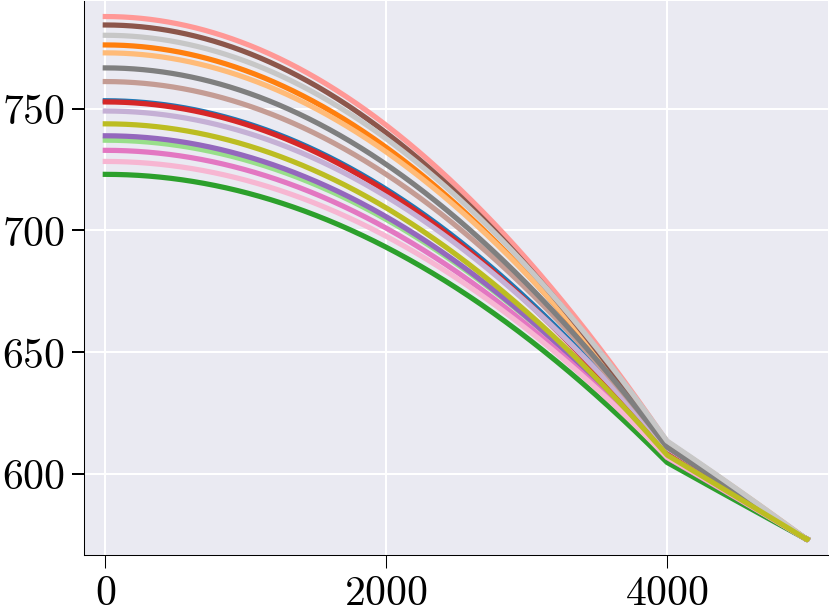

In [180]:
plt.plot(NLS_rom_h.T)